## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
import pickle

# Libraries to cluster data
import genieclust

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.cm as cm
from cluster_visualization_helper import (
    visualize_cluster)  # user-defined functions

# Libraries for evaluation
from sklearn import metrics
# from scipy.cluster.hierarchy import cophenet

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
RESULT_DIR = BASE_DIR + "RESULTS/"

SEED = 6886
%matplotlib inline

## Import data

In [3]:
# title_embeddings_matrix = np.load(OUTPUT_DIR + "title_embeddings_distance_matrix.npy")
# title_embeddings_matrix.shape

In [4]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
# Load clean job title dataset from file
title_docs = pd.read_csv(
    OUTPUT_DIR + "clean_title_df.csv",
    converters={
        "job_title_token": ast.literal_eval,
    },
    dtype={
        "job_id": int,
        "job_title": str,
        "job_title_lemma": str,
    }
)

In [5]:
title_embeddings.shape, title_docs.shape

((18992, 300), (18992, 4))

In [6]:
title_docs

,job_id,job_title,job_title_lemma,job_title_token
0,1,Chief Financial Officer,chief financial officer,"[chief, financial, officer]"
1,2,Full-time Community Connections Intern (paid i...,time community connection intern pay internship,"[time, community, connection, intern, pay, int..."
2,3,Country Coordinator,country coordinator,"[country, coordinator]"
3,4,BCC Specialist,bcc specialist,"[bcc, specialist]"
4,5,Software Developer,software developer,"[software, developer]"
...,...,...,...,...
18987,18997,Senior Creative UX/ UI Designer,senior creative ux ui designer,"[senior, creative, ux, ui, designer]"
18988,18998,Category Development Manager,category development manager,"[category, development, manager]"
18989,18999,Operational Marketing Manager,operational marketing manager,"[operational, marketing, manager]"
18990,19000,Head of Online Sales Department,head online sale department,"[head, online, sale, department]"


## Clustering data

### Genie

In [7]:
def genie_clusterer(X, n_clusters):
    """Generate clusters using Genie method

    Args:
        X:           Matrix of features
                      (n_samples, n_features)
        n_clusters:  Number of clusters
                      (int) n_clusters = 1 can act as a noise point/outlier detector

    Returns:
        Trained clustering model based on X
    """
    clusterer = genieclust.Genie(
        n_clusters=n_clusters,
        #         affinity="precomputed",
        exact=True,
        compute_full_tree=True,
        verbose=True,
    )
    clusterer.fit(X)
    return clusterer

In [8]:
# Define search space for tuning hyperparameters
X = title_embeddings
tuning_result = {
    "n_clusters": [],
    "duration": [],
}
# duration_list = []
model_list = []
label_list = []
# k_range = list(range(2, 301))
k_range = list(range(5, 25, 5))
k_range.extend(list(range(25, 110, 25)))
k_range.extend([150, 200, 250, 300])
len(k_range), k_range

(12, [5, 10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 300])

In [9]:
# Tuning hyperparameter
start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

for k in tqdm(k_range):
    # Train model
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clusterer = genie_clusterer(X, n_clusters=k)

    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    # Save model
    pickle.dump(
        clusterer,
        open(
            OUTPUT_DIR
            + "genie/"
            + "title_genie_model_k-"
            + str(k)
            + ".pkl",
            "wb",
        ),
    )

    # Write result into list
    model_list.append(clusterer)
    label_list.append(clusterer.labels_)
    tuning_result['n_clusters'].append(k)
    tuning_result['duration'].append(round((endtime - starttime).seconds/60, 4))

end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Start loop 2021-05-18 00:11:49.783204
Start 2021-05-18 00:11:49.787203


[genieclust] Preprocessing data.
[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
  8%|██████▉                                                                            | 1/12 [00:14<02:44, 15.00s/it][genieclust] Preprocessing data.


End 2021-05-18 00:12:04.783160
Duration 0:00:14.995957
Start 2021-05-18 00:12:04.788160


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 17%|█████████████▊                                                                     | 2/12 [00:28<02:23, 14.33s/it][genieclust] Preprocessing data.


End 2021-05-18 00:12:18.648635
Duration 0:00:13.860475
Start 2021-05-18 00:12:18.650636


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 25%|████████████████████▊                                                              | 3/12 [00:47<02:24, 16.09s/it][genieclust] Preprocessing data.


End 2021-05-18 00:12:36.825169
Duration 0:00:18.174533
Start 2021-05-18 00:12:36.839173


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 33%|███████████████████████████▋                                                       | 4/12 [01:10<02:32, 19.05s/it][genieclust] Preprocessing data.


End 2021-05-18 00:13:00.412100
Duration 0:00:23.572927
Start 2021-05-18 00:13:00.415101


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 42%|██████████████████████████████████▌                                                | 5/12 [01:26<02:05, 17.90s/it][genieclust] Preprocessing data.


End 2021-05-18 00:13:16.281054
Duration 0:00:15.865953
Start 2021-05-18 00:13:16.287057


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 50%|█████████████████████████████████████████▌                                         | 6/12 [01:42<01:44, 17.40s/it][genieclust] Preprocessing data.


End 2021-05-18 00:13:32.686008
Duration 0:00:16.398951
Start 2021-05-18 00:13:32.706012


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 58%|████████████████████████████████████████████████▍                                  | 7/12 [01:59<01:25, 17.08s/it][genieclust] Preprocessing data.


End 2021-05-18 00:13:49.016964
Duration 0:00:16.310952
Start 2021-05-18 00:13:49.121971


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 67%|███████████████████████████████████████████████████████▎                           | 8/12 [02:13<01:05, 16.27s/it][genieclust] Preprocessing data.


End 2021-05-18 00:14:03.626921
Duration 0:00:14.504950
Start 2021-05-18 00:14:03.655926


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [02:28<00:47, 15.72s/it][genieclust] Preprocessing data.


End 2021-05-18 00:14:18.165882
Duration 0:00:14.509956
Start 2021-05-18 00:14:18.170882


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [02:43<00:31, 15.68s/it][genieclust] Preprocessing data.


End 2021-05-18 00:14:33.772837
Duration 0:00:15.601955
Start 2021-05-18 00:14:33.776839


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [02:58<00:15, 15.46s/it][genieclust] Preprocessing data.


End 2021-05-18 00:14:48.729440
Duration 0:00:14.952601
Start 2021-05-18 00:14:48.735444


[genieclust] Determining clusters with Genie++.
[genieclust] Postprocessing outputs.
[genieclust] Done.
100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:13<00:00, 16.16s/it]

End 2021-05-18 00:15:03.686398
Duration 0:00:14.950954
End loop 2021-05-18 00:15:03.694399
Duration 0:03:13.911195


In [10]:
tuning_result["silhouette"] = []
tuning_result["silhouette_error"] = []

tqdm_bar = tqdm(desc="Computing Silhouette score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        silhouette = metrics.silhouette_score(
            X, label_list[i], sample_size=10000, random_state=SEED, n_jobs=-1
        )
        tuning_result["silhouette_error"].append("None")
    except Exception as e:
        print(e)
        silhouette = -1.1
        tuning_result["silhouette_error"].append(e)
    tuning_result["silhouette"].append(silhouette)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Silhouette score: 100%|██████████████████████████████████████████████████████| 12/12 [00:39<00:00,  3.32s/it]


In [11]:
tuning_result["calinski_harabasz"] = []
tuning_result["calinski_harabasz_error"] = []

tqdm_bar = tqdm(desc="Computing Calinski Harabasz score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        calinski_harabasz = metrics.calinski_harabasz_score(X, label_list[i])
        tuning_result["calinski_harabasz_error"].append("None")
    except Exception as e:
        print(e)
        calinski_harabasz = -1.1
        tuning_result["calinski_harabasz_error"].append(e)
    tuning_result["calinski_harabasz"].append(calinski_harabasz)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Calinski Harabasz score: 100%|███████████████████████████████████████████████| 12/12 [00:00<00:00, 15.44it/s]


In [12]:
tuning_result["davies_bouldin"] = []
tuning_result["davies_bouldin_error"] = []

tqdm_bar = tqdm(desc="Computing Davies Bouldin score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        davies_bouldin = metrics.davies_bouldin_score(X, label_list[i])
        tuning_result["davies_bouldin_error"].append("None")
    except Exception as e:
        print(e)
        davies_bouldin = -1.1
        tuning_result["davies_bouldin_error"].append(e)
    tuning_result["davies_bouldin"].append(davies_bouldin)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Davies Bouldin score: 100%|██████████████████████████████████████████████████| 12/12 [00:00<00:00, 12.40it/s]


In [39]:
tuning_result["silhouette_corr"] = []
tuning_result["silhouette_corr_error"] = []

tqdm_bar = tqdm(desc="Computing Silhouette (correlation) score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        silhouette = metrics.silhouette_score(
            X, label_list[i], sample_size=10000, random_state=SEED, n_jobs=-1, metric="correlation"
        )
        tuning_result["silhouette_corr_error"].append("None")
    except Exception as e:
        print(e)
        silhouette = -1.1
        tuning_result["silhouette_corr_error"].append(e)
    tuning_result["silhouette_corr"].append(silhouette)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Silhouette (correlation) score: 100%|████████████████████████████████████████| 12/12 [02:14<00:00, 11.23s/it]


In [40]:
# Display tuning results
tuning_result_df = pd.DataFrame(tuning_result)
tuning_result_df

,n_clusters,duration,silhouette,silhouette_error,calinski_harabasz,calinski_harabasz_error,davies_bouldin,davies_bouldin_error,silhouette_corr,silhouette_corr_error
0,5,0.2333,0.020601,None,636.529102,None,4.486045,None,0.0,None
1,10,0.2167,0.017232,None,410.855212,None,4.941389,None,0.0,None
2,15,0.3000,0.005448,None,311.178997,None,4.812384,None,0.0,None
3,20,0.3833,0.020303,None,284.734130,None,4.621135,None,0.0,None
4,25,0.2500,0.038138,None,277.975729,None,4.150917,None,0.0,None
5,50,0.2667,0.060910,None,209.677178,None,3.679507,None,0.0,None
6,75,0.2667,0.081283,None,178.716483,None,3.407791,None,0.0,None
7,100,0.2333,0.085654,None,151.656886,None,3.220022,None,0.0,None
8,150,0.2333,0.128851,None,135.916514,None,2.912756,None,0.0,None
9,200,0.2500,0.158204,None,119.042612,None,2.827629,None,0.0,None


In [41]:
# Save tuning results
tuning_result_df.to_csv(
    RESULT_DIR + "genie/" + "title_genie_tuning_result.csv", index=False
)

In [42]:
# Combine model sets
tuple_objects = (
    model_list,
    label_list,
    tuning_result,
)
len(tuple_objects), len(tuple_objects[0])

(3, 12)

In [43]:
# Save tuple of model sets
pickle.dump(
    tuple_objects, open(RESULT_DIR + "genie/" + "title_genie_model_tuning_list.pkl", "wb")
)

## Evaluate cluster performance

#### Silhoulette score

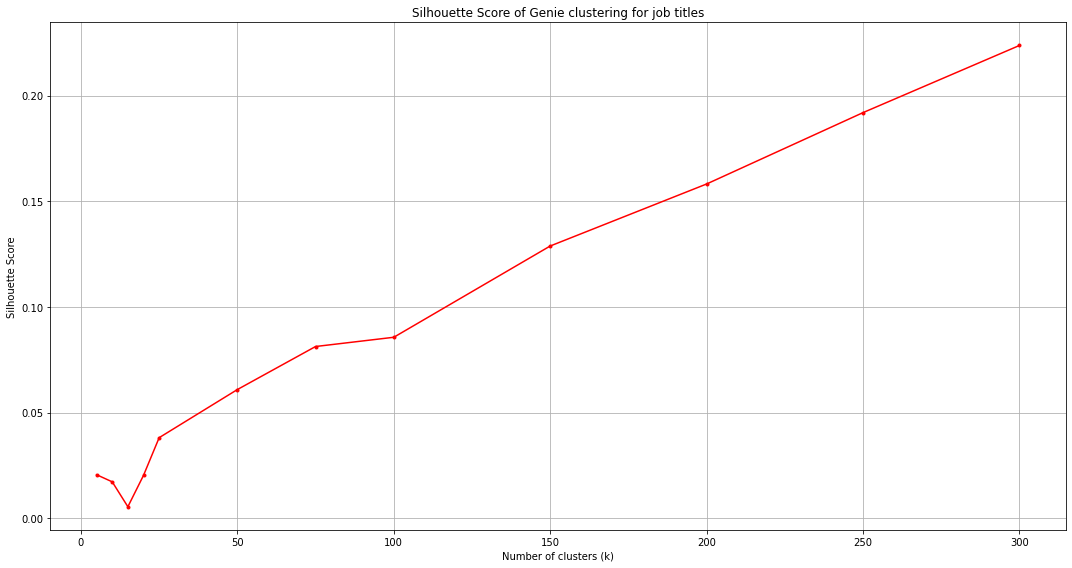

In [17]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["silhouette"], "r.-")
plt.title("Silhouette Score of Genie clustering for job titles")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Silhouette Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "genie/" + "title_genie_silhouette_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

#### Calinski Harabasz Score

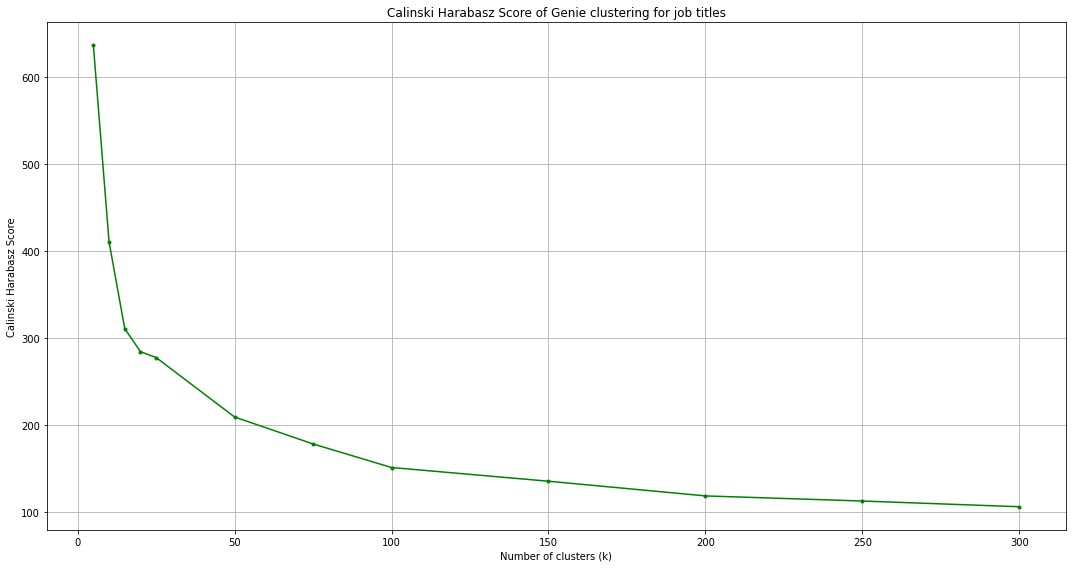

In [18]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["calinski_harabasz"], "g.-")
plt.title("Calinski Harabasz Score of Genie clustering for job titles")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Calinski Harabasz Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "genie/" + "title_genie_calinski_harabasz_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

#### Davies-Bouldin Score

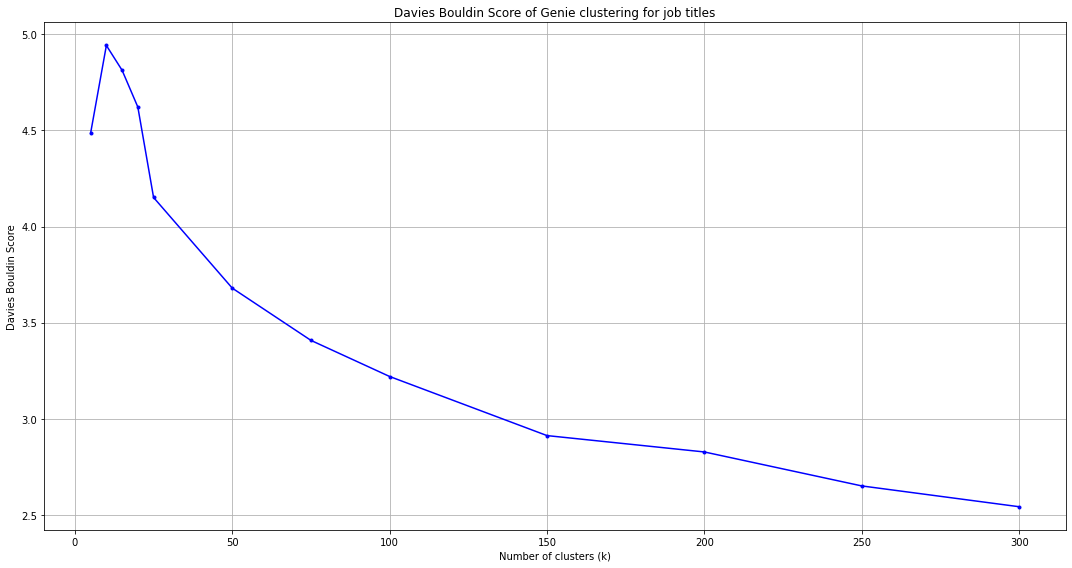

In [19]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["davies_bouldin"], "b.-")
plt.title("Davies Bouldin Score of Genie clustering for job titles")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Davies Bouldin Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "genie/" + "title_genie_davies_bouldin_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

## Visualize clusters

In [32]:
# best_index = np.argmax(tuning_result['silhouette'])
best_index = int(np.where(np.array(tuning_result['n_clusters']) == 20)[0])
print('Index of best model =', best_index)

best_k = tuning_result['n_clusters'][best_index]
print(f'Optimal number of clusters (k) = {best_k}')

best_labels = label_list[best_index]

Index of best model = 3
Optimal number of clusters (k) = 20


In [27]:
pca_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_pca_datapoints.npy")
umap_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_umap_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_tsne_datapoints.npy")

Start PCA 2021-05-18 00:21:42.260222
End PCA 2021-05-18 00:21:42.265227
PCA duration 0:00:00.005005

Start t-SNE 2021-05-18 00:21:42.265227
End t-SNE 2021-05-18 00:21:42.271264
t-SNE duration 0:00:00.006037

Start UMAP 2021-05-18 00:21:42.271264
End UMAP 2021-05-18 00:21:42.275263
UMAP duration 0:00:00.003999



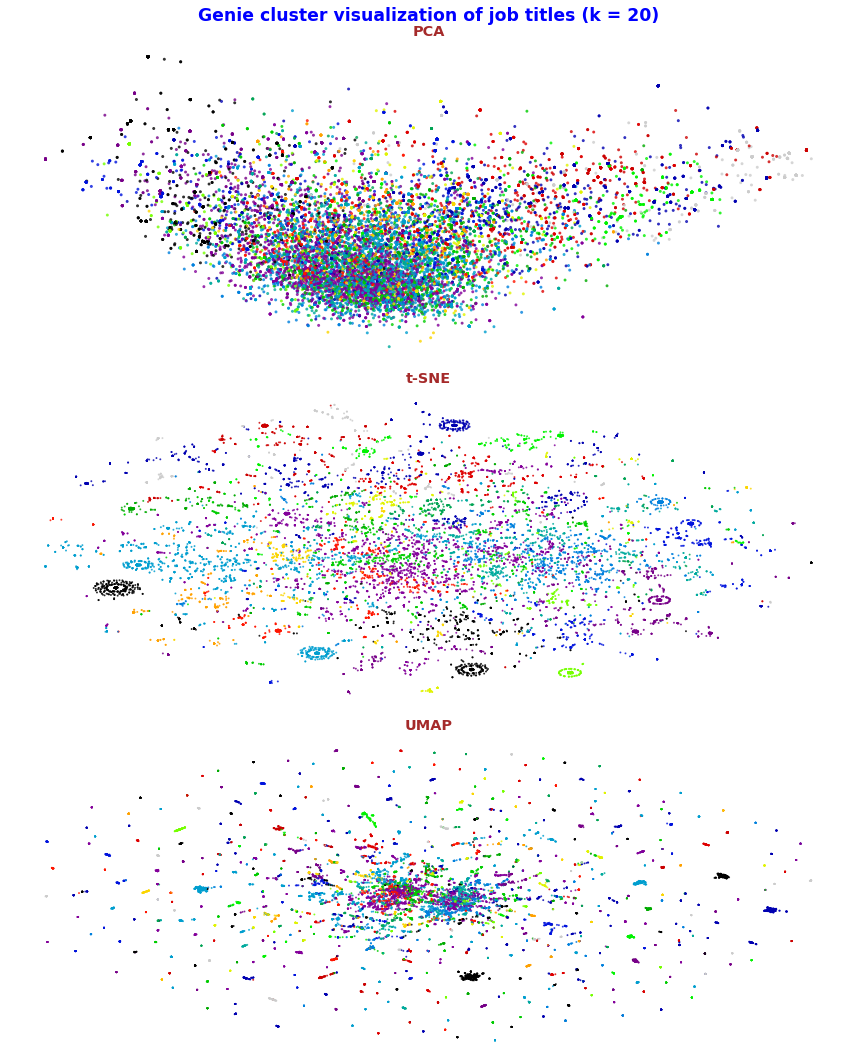

In [33]:
plot_title = f"Genie cluster visualization of job titles (k = {best_k})"
plot_filename = (
    RESULT_DIR + "genie/" + "title_genie_optimal-cluster-visualization.png"
)
palette = sns.color_palette("nipy_spectral", as_cmap=True)
# colors = cm.nipy_spectral(best_labels.astype(float) / best_k)
colors = best_labels

# Visualize clusters with PCA, UMAP, and t-SNE
visualize_cluster(
    plot_title,
    (12, 15),
    colors,
    palette,
    4,
    pca_datapoint,
    tsne_datapoint,
    umap_datapoint,
    pca=True,
    tsne=True,
    compute_umap=True,
    save_plots=True,
    plot_file=plot_filename,
)

## Display top words of each cluster

In [34]:
df_clusters = title_docs.copy(deep=True)
df_clusters["model_type"] = "genie"
df_clusters["title_n_clusters"] = best_k
# df_clusters["embeddings"] = "job_title"
df_clusters['title_cluster_label'] = best_labels
df_clusters

,job_id,job_title,job_title_lemma,job_title_token,model_type,title_n_clusters,title_cluster_label
0,1,Chief Financial Officer,chief financial officer,"[chief, financial, officer]",genie,20,0
1,2,Full-time Community Connections Intern (paid i...,time community connection intern pay internship,"[time, community, connection, intern, pay, int...",genie,20,1
2,3,Country Coordinator,country coordinator,"[country, coordinator]",genie,20,1
3,4,BCC Specialist,bcc specialist,"[bcc, specialist]",genie,20,2
4,5,Software Developer,software developer,"[software, developer]",genie,20,3
...,...,...,...,...,...,...,...
18987,18997,Senior Creative UX/ UI Designer,senior creative ux ui designer,"[senior, creative, ux, ui, designer]",genie,20,11
18988,18998,Category Development Manager,category development manager,"[category, development, manager]",genie,20,8
18989,18999,Operational Marketing Manager,operational marketing manager,"[operational, marketing, manager]",genie,20,2
18990,19000,Head of Online Sales Department,head online sale department,"[head, online, sale, department]",genie,20,6


In [35]:
wordcount = {}
sorted_wordcount = {}
for i in range(best_k):
    titles = df_clusters[df_clusters['title_cluster_label'] == i]["job_title_lemma"].values
    titles = ' '.join(' '.join(titles).split())
    wordcount[i] = {}
    for j in titles.split():
        if j in wordcount[i]: 
            wordcount[i][j] += 1
        else:
            wordcount[i][j] = 1
    sorted_wordcount[i] = sorted(wordcount[i].items(), key=lambda x: x[1], reverse=True)

In [36]:
topwords = {}
for key, i in sorted_wordcount.items():
    print("Cluster "+str(key)+": ", end='')
    topwords[key] = ''
    for newkey, j in sorted_wordcount[key][:10]:
        print(newkey + '|', end='')
        topwords[key] = topwords[key] + newkey + '|'
    print()

Cluster 0: accountant|chief|officer|finance|financial|assistant|manager|credit|cashier|accounting|
Cluster 1: assistant|manager|administrative|receptionist|office|program|hr|secretary|administrator|coordinator|
Cluster 2: specialist|marketing|senior|department|head|internal|development|financial|unit|engineer|
Cluster 3: developer|software|senior|net|engineer|analyst|team|asp|leader|programmer|
Cluster 4: language|english|translator|director|assistant|executive|course|interpreter|officer|chief|
Cluster 5: manager|project|officer|program|development|programme|expert|coordinator|assistant|local|
Cluster 6: sale|manager|representative|medical|marketing|head|specialist|service|department|development|
Cluster 7: project|coordinator|assistant|specialist|manager|public|training|relation|program|director|
Cluster 8: engineer|quality|manager|assurance|qa|technical|project|coordinator|senior|civil|
Cluster 9: administrator|system|network|engineer|specialist|database|senior|support|transmission|t

## Save cluster results to file

In [37]:
df_clusters.to_csv(
    RESULT_DIR + "genie/" + "title_genie_optimal-cluster-labels.csv", index=False
)

In [38]:
# Save tuple of model sets
pickle.dump(
    (sorted_wordcount, topwords), open(RESULT_DIR + "genie/" + "title_genie_optimal-topwords.pkl", "wb")
)